In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('data.csv')
df.head()

,CustomerID,Gender,Age,INCOME,SPEND
0,1,Male,19,233,150
1,2,Male,21,250,187
2,3,Female,20,204,172
3,4,Female,23,236,178
4,5,Female,31,354,163


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   INCOME      200 non-null    int64 
 4   SPEND       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,INCOME,SPEND
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,241.945000,155.550000
std,57.879185,13.969007,47.235771,20.413009
min,1.000000,18.000000,126.000000,96.000000
25%,50.750000,28.750000,209.000000,144.000000
50%,100.500000,36.000000,235.000000,159.000000
75%,150.250000,49.000000,268.000000,170.250000
max,200.000000,70.000000,417.000000,202.000000


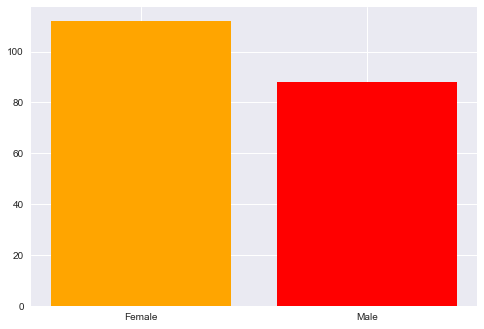

In [5]:
count=np.unique(df['Gender'],return_counts=True)
plt.bar([1,2],height=count[1],width=0.8,color=['orange','red'],tick_label=count[0])
plt.show()

the number of females is higher than the males.

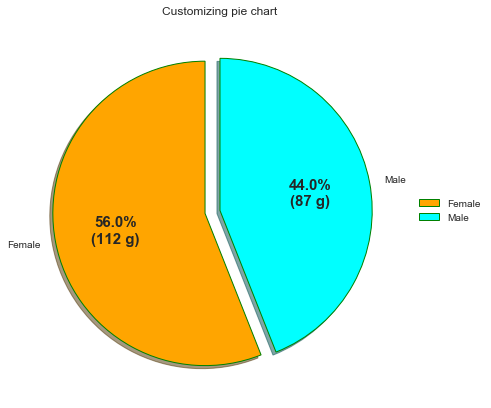

In [6]:
# plt.pie(count[1]/np.sum(count[1]),labels=count[0])
explode = (0.1, 0.0) 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(count[1], autopct = lambda pct: func(pct,count[1]),
explode = explode, labels = count[0],  shadow = True,colors=("orange", "cyan"), wedgeprops = { 'linewidth' : 1, 'edgecolor' : "green" } ,startangle = 90) 

ax.legend(wedges, count[0],loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 15, weight ="bold") 
ax.set_title("Customizing pie chart") 
plt.show() 

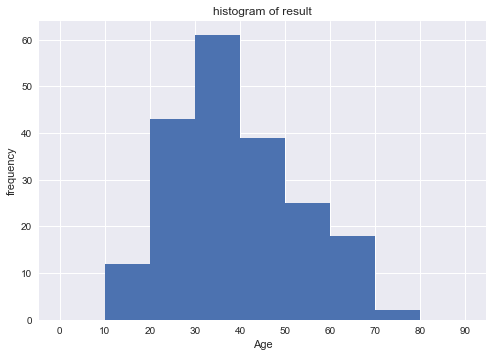

In [7]:
fig,ax = plt.subplots(1,1)
ax.hist(df['Age'], bins = np.arange(0,100,10))
ax.set_title("histogram of result")
ax.set_xticks(np.arange(0,100,10))
ax.set_xlabel('Age')
ax.set_ylabel('frequency')
plt.show()

In [8]:
import seaborn as sns

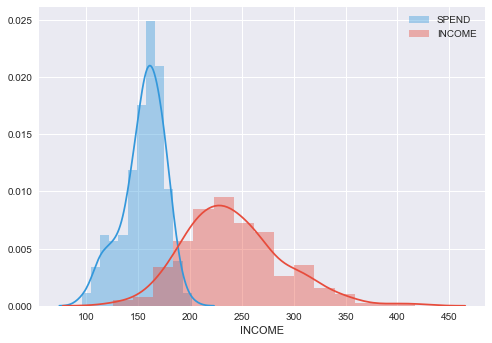

In [9]:
plot_spend=sns.distplot(df['SPEND'], color="#3498db",label='SPEND')
plot_income=sns.distplot(df['INCOME'], color="#e74c3c",label='INCOME')
plt.legend()
plt.show()

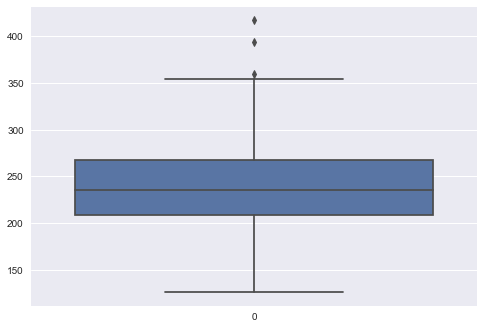

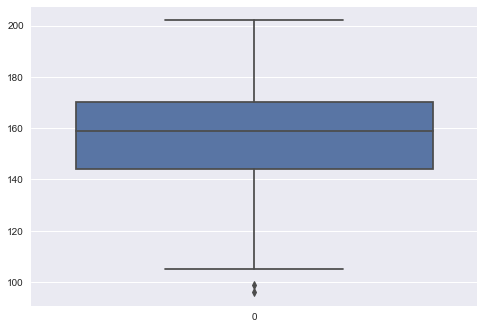

In [10]:
sns.boxplot(data=df['INCOME'])
plt.show()
sns.boxplot(data=df['SPEND'])
plt.show()

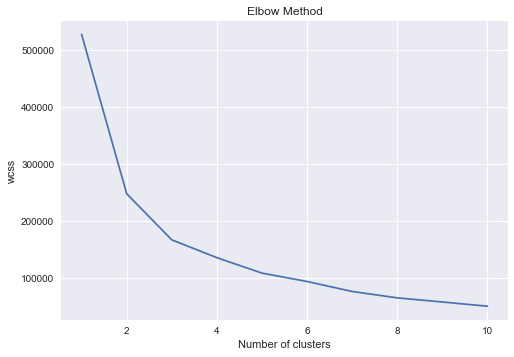

In [11]:
# elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = [] 
X=df.iloc[:,-2:].values
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0) 
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

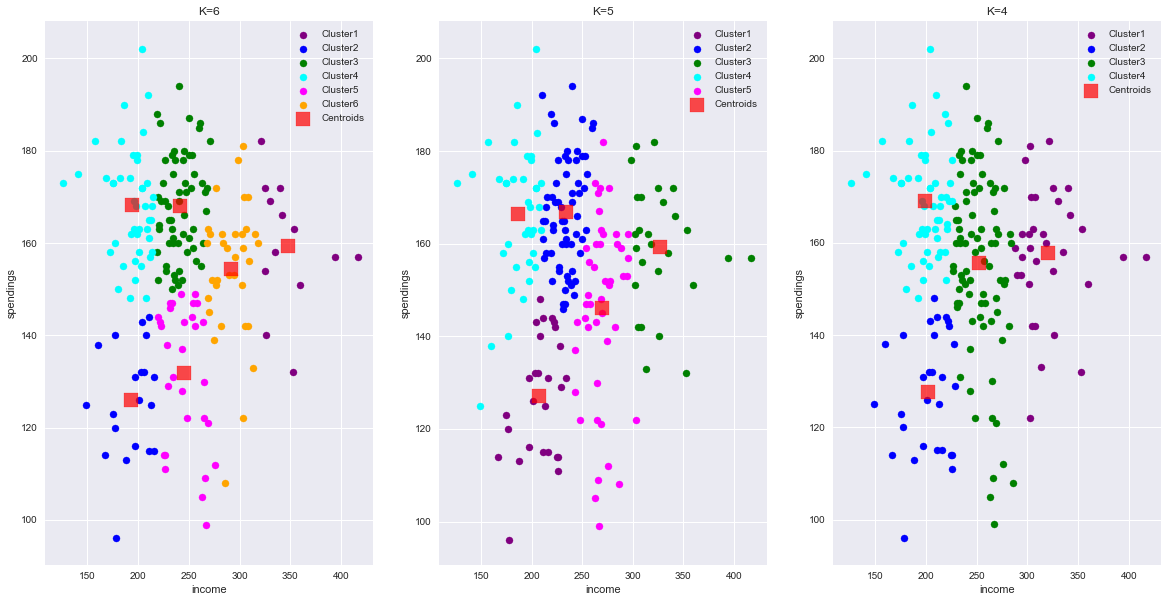

<Figure size 576x396 with 0 Axes>

In [21]:
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km6.fit_predict(X) 
plt.figure(figsize =(20, 10))
plt.subplot(1,3,1)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1') #s : scalar or array_like, shape (n, ),means the size of each scatter
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('K=6')
plt.xlabel('income')
plt.ylabel('spendings')
plt.legend()

km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(X) 
plt.subplot(1,3,2)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1') #s : scalar or array_like, shape (n, ),means the size of each scatter
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('K=5')
plt.xlabel('income')
plt.ylabel('spendings')
plt.legend()

km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X) 
plt.subplot(1,3,3)
#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1') #s : scalar or array_like, shape (n, ),means the size of each scatter
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('K=4')
plt.xlabel('income')
plt.ylabel('spendings')
plt.legend()
plt.show()

#### Setting the number of clusters to 6 seems to provide a more meaningful customer segmentation.
- Cluster 1: Medium income, low annual spend
- Cluster 2: Low income, low annual spend
- Cluster 3: High income, high annual spend
- Cluster 4: Low income, high annual spend
- Cluster 5: Medium income, medium annual spend
- Cluster 6: Very high income, high annual spend


##### Marketing strategies for the customer segments
 Based on the 6 clusters, we could formulate marketing strategies relevant to each cluster: 

- A typical strategy would focus certain promotional efforts for the high value customers of Cluster 6 & Cluster 3.
- A typical strategy would focus certain promotional efforts for the high value customers of Cluster 6 & Cluster 3.
- Cluster 4 is a unique customer segment, where in spite of their relatively lower annual income, these customers tend to spend more on the site, indicating their loyalty. There could be some discounted pricing based promotional campaigns for this group so as to retain them.
- For Cluster 2 where both the income and annual spend are low, further analysis could be needed to find the reasons for the lower spend and price-sensitive strategies could be introduced to increase the spend from this segment.
-Customers in clusters 1 is not spending enough on the site in spite of a good annual income —further analysis of these segments could lead to insights on the satisfaction / dissatisfaction of these customers or lesser visibility of the e-commerce site to these customers. Strategies could be evolved accordingly.